# NumPy

`NumPy` используется как основа почти для всех математических библиотек в `Python`. В пакете реализоавны и хорошо оптимизированы базовые операции над векторами, матрицами и т.п. (`BLAS`). Основные функции `NumPy` реализованы на языке `C`.

In [36]:
import numpy as np

### Создание массивов

Основная концепция в `NumPy` - типизированный многомерный массив, весь остальной функцинал завязан вокруг этого.  Существует много способов [создания массива](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

Из обычного списка Python

In [37]:
a  = np.array([[1.5, 4.5], [1, 2]])

In [38]:
a.astype('int64')

array([[1, 4],
       [1, 2]])

In [39]:
ar = np.array([1, 2.6])

In [40]:
ar = np.array([[1, 2], [3, 4]])
ar

array([[1, 2],
       [3, 4]])

Размерность массива можно узнать с помощью функции 
> np.shape()

или свойства .shape

> ar.shape

In [41]:
print(np.shape(ar), ar.shape)

(2, 2) (2, 2)


#### Массив можно создать с помощью специальных функций.

Одномерный массив из нулей

In [42]:
np.zeros(5) # лучше np.zeros((5, ))

array([0., 0., 0., 0., 0.])

Двумерный массив (матрица) из нулей

In [43]:
np.zeros((3, 3), dtype='int64')

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Двумерный массив из единиц

In [44]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Массив из чисел от 1 включительно до 10 через 2

In [45]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

Массив из чисел на отрезке от 1 до 10 состоящий и 5 элементов на равных промежутках

In [46]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

Диагональная матрица с указанными элементами


In [47]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Единичная матрица

In [48]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Массивы numpy типизированы, тип массива выводится во время создания, но его можно указать явно:

In [49]:
ar = np.array([1, 2, 3], dtype=np.double)
ar

array([1., 2., 3.])

In [50]:
ar.dtype

dtype('float64')

Физически массивы numpy - это массив байт, разменость хранится отдельно и её можно поменять с помощью метода (общий размер не должен меняться)

> .reshape

В некоторых случаях операция может копировать данные.

Изменим размер матрицы $2 \times 3$ на $3 \times 2$. При этом данные буфера общие для двух массивов. 

In [51]:
a = np.array([[1, 2, 3], [3, 4, 5]]) 
b = a.reshape((3, 2))
a[1, 1] = 7
b

array([[1, 2],
       [3, 3],
       [7, 5]])

In [52]:
a[1, 1]

7

Изменим размерность массива из чисел от 0 до 15

In [53]:
a = np.arange(0, 16)
b = a.reshape((2, 8))
print('a =', a)
print('b =', b)

a = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
b = [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


При этом видим, что у них общий буфер. Если мы изменим один массив, то изменится и другой

In [54]:
b[1, 0] = 18
print('a =', a)
print('b =', b)

a = [ 0  1  2  3  4  5  6  7 18  9 10 11 12 13 14 15]
b = [[ 0  1  2  3  4  5  6  7]
 [18  9 10 11 12 13 14 15]]


Для изменения общего размера массива применяется метод `.resize`. При этом может производиться копирование данных, эту операцию следует использовать с осторожностью

In [55]:
a = np.arange(0, 16)
a.resize((3, 8))

print(a)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [ 0  0  0  0  0  0  0  0]]


### Индексация массивов

К элементам массива можно обращаться так же, как мы это делаем для списков или строк `Python`

In [56]:
a = np.arange(0, 16).reshape((4, 4))
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [57]:
print(a[0, 2], a[0][2])

2 2


#### Slicing

`Slicing` - это получение "среза" массива или под массива. В случае матрицы операцию можно интерпретировать как получение под матрицы. 

В данном случае берем первые две строки и 1,2-й столбец. 

In [58]:
print(a[0:2,1:3])

[[1 2]
 [5 6]]


Можно оставить только третью строку, в этом случае получим одномерный массив

In [59]:
print(a[2, :])

[ 8  9 10 11]


можно взять строки и столбцы в обратном порядке

In [60]:
print(a[0:2, ::-1])

[[3 2 1 0]
 [7 6 5 4]]


Slicing можно использовать для изменения массивов, например изменяем все элементы второго столбцы на 1. 

In [61]:
a[:, 1] = 1
print(a)

[[ 0  1  2  3]
 [ 4  1  6  7]
 [ 8  1 10 11]
 [12  1 14 15]]


Или первые два элемента первой строки

In [62]:
a[0, :2] = np.ones(2)
print(a)

[[ 1  1  2  3]
 [ 4  1  6  7]
 [ 8  1 10 11]
 [12  1 14 15]]


#### Advanced indexing

Если в качестве индексатора использовать массивы одинакового размера, то создастся подмасив из соответствующих элементов

In [63]:
a = np.arange(16).reshape((4, 4))
print(a)

rows = [1, 3]
columns = [2, 2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [64]:
# получаем массив [ a[row[0], column[0]], a[row[1], column[1]] ]
print(a[rows, columns])

[ 6 14]


In [65]:
print(a[ [[0, 0], [1, 1]], [[2, 2], [3, 3]] ])

[[2 2]
 [7 7]]


Можно смешивать способоы индексации

In [66]:
print(a[[0, 1], :2])

print(a[2:, [0, 1]])

[[0 1]
 [4 5]]
[[ 8  9]
 [12 13]]


Можно использовать маски из логических значений:

In [67]:
print(a > 3)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [68]:
print(a[a > 3])

[ 4  5  6  7  8  9 10 11 12 13 14 15]


In [69]:
print(a.sum(axis=1) > 8)

[False  True  True  True]


Получение подматрицы, где остаются только те строки, сумма элементов которых строго больше 8

In [70]:
a[a.sum(axis=1) > 8]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### Базовые операции

Массивы имеют обширный набор методов для совершения тех или иных операций над своими элементами. Например для суммирования, нахождение максимума или минимума, нахождения среднего значения и мное другое. Характерная особенность таких операций состоит в том, что они могут применяться к элементам  по определенным осям ("вдоль оси").

Например, в данном примере происходит суммирование всех элементов матрицы, суммировании строк (вдоль оси "0") и столбцов (вдоль оси "1").

In [71]:
ar = np.ones((4, 4)) * np.array([[1, 2, 3, 4]])
ar

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [72]:
print(ar.sum(), ar.sum(axis=0), ar.sum(axis=1), sep=';')

40.0;[ 4.  8. 12. 16.];[10. 10. 10. 10.]


Матрицы можно развернуть в одномерный массив

In [73]:
ar.ravel()

array([1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4.])

Два массива можно соединить вдоль определенной оси. При этом обязательно, чтобы вдоль этой оси размерность была одинаковой. В примере одна матрица присоединяется к другой "сверху" или "вдоль оси 0"

In [74]:
a = np.arange(0, 5).reshape((1, 5))
b = np.arange(5, 10).reshape((1, 5))
np.concatenate((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Аналогично "вдоль оси 1"

In [75]:
np.concatenate((a, b), axis=1)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Для наглядности, если нужно соединить сверху или вдоль, то применяются методы `vstack` и `hstack`

In [76]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [77]:
np.hstack((a, b))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### Линейная алгебра

Для массивов `NumPy` переопределены все базовые математические операции, при этом они выполняются поэлементно, если размерности совпадают и с помощью специальных правил ("broadcasting") в противном случае

In [78]:
mat = np.ones((5, 5))
mat

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [79]:
mat + mat

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Если размерности не совпадают, то операции совершаются рекурсивно над подмассивом соответствующей размерности вдоль возможной старшей оси. 

Ко всем элементам матрицы можно прибавить число

In [80]:
mat + 2

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

Ко всем строкам можно прибавить строку

In [81]:
mat + np.array([1, 2, 3, 4, 5])

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

Ко всем столбцам - столбец

In [82]:
mat + np.array([[1], [2], [3], [4], [5]])

array([[2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6.]])

Ну или просто сложить две матрицы

In [83]:
mat + np.ones(5)

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Аналогично с операцией умножения (важно понимать, что это не матричное умножение), деления и так далее

In [84]:
5 * mat

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

Синус над всеми элементами матрицы

In [85]:
np.sin(mat)

array([[0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098]])

Другие базовы операции:

In [86]:
mat = np.arange(16).reshape(4, 4)
#транспонирование
mat.T, mat.transpose()

# матричное умножение
np.dot(mat, mat)
mat @ mat
mat.dot(mat)

# определитель
np.linalg.det(mat)

# обратная матрица
np.linalg.inv(np.array([[1, 0], [0, 1]]))

# псевдообратная матрица
np.linalg.pinv(mat)

# собственные числа
np.linalg.eigvals(mat)

# собственные вектора
np.linalg.eig(mat)

# SVD разложение
np.linalg.svd(mat)

(array([[-0.09184212, -0.83160389,  0.53515573,  0.11665482],
        [-0.31812733, -0.44586433, -0.80049034,  0.24334177],
        [-0.54441254, -0.06012478, -0.00448651, -0.836648  ],
        [-0.77069775,  0.32561478,  0.26982112,  0.47665141]]),
 array([3.51399637e+01, 2.27661021e+00, 1.69970911e-15, 8.07447880e-17]),
 array([[-0.42334086, -0.47243254, -0.52152422, -0.57061589],
        [ 0.72165263,  0.27714165, -0.16736932, -0.6118803 ],
        [-0.22125808,  0.66846675, -0.67315927,  0.2259506 ],
        [ 0.50104377, -0.50314233, -0.49684666,  0.49894522]]))

### Функции

Важно понимать, что для массивов, помимо умножения, деления и пр., нужно использовать лишь специализированные версии операций из пакета `NumPy`. Например, в данном примере при попытке использовать операцию  `cos` из стандартной библиотеки `Python` произойдет ошибка

In [87]:
def foo(x):
    return x * np.cos(x) - np.sin(x)

foo(np.array([1, 2, 7]))

array([-0.30116868, -1.7415911 ,  4.62032918])

С помощью декоратора `vectorize` можно получить специализированную версию функции, которая будет применяться ко всем элементам массива `NumPy` поэлементно. Важно понимать, что часто подобные операции неэффективны и их следует применять лишь в исключительных случаях

In [88]:
@np.vectorize
def foo(x):
    if x > 5:
        return 1
    return 0

foo(np.array([1, 2, 7]))

array([0, 0, 1])

In [89]:
a = np.arange(1, 5)
a.reshape((4, 1)) * a

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

### Сохранение состояния

Массивы `NumPy` могут быть сохранены в бинарном виде 

In [90]:
import tempfile

with tempfile.NamedTemporaryFile(suffix='.npy') as fn:
    np.save(fn.name, np.array([1, 2, 3]))
    a = np.load(fn.name)
    print(a)

[1 2 3]


### Случайные числа

`NumPy` содержит большое количество различных математических функций. Остановимся на модуле `numpy.random` в котором содержится большое количество методов для получения массивов из псевдослучайных чисел.

Получение случайной матрицы $5 \times 5$ из целых чисел на полуинтервале от 0 до 5.

In [91]:
import numpy.random as rnd

rnd.randint(0, 5, (5, 5))

array([[4, 4, 4, 0, 4],
       [3, 2, 3, 3, 0],
       [2, 1, 1, 3, 0],
       [0, 2, 3, 3, 1],
       [4, 0, 1, 2, 0]])

Сэмплинг матрицы размерностью $2 \times 2$ из нормального распределения, с математическим ожиданием 5 и среднеквадратичным отклонением 1. 

In [92]:
rnd.normal(5., 1, size=(2, 2))

array([[4.93290879, 5.74369368],
       [5.05329687, 3.95595909]])

Семплинг из распределения Дирихле.

In [93]:
rnd.dirichlet(alpha=[2, 3])

array([0.33197762, 0.66802238])

|                           | NumPy                            | PyTorch                               |
|---------------------------|----------------------------------|---------------------------------------|
| Нулевая матриц            | `np.zeros((5, 5))`               | `torch.zeros(5, 5)`                   |
| Матрица из единиц         | `np.ones((5, 5))`                | `torch.ones(5, 5)`                    |
| Через заданный промежуток | `np.arange(1, 10, 1)`            | `torch.arange(1, 10, 1)`              |
| Через равные промежутки   | `np.linspace(1, 10, 5)`          | `torch.linspace(1, 10, 5)`            |
| Изменить размерность      | `x.reshape((1, 5))`              | `x.view(1, 5)`, `torch.reshape(1, 5)` |
| Узнать размерность        | `x.shape`                        | `x.size()`                            |
| Матричное умножение       | `x @ y, np.dot(x, y)`            | `torch.mm(x, y)`, `x @ y`             |
| Конкатенация              | `np.concatenate((x, y), axis=1)` | `torch.cat((x, x), axis=1)`           |
| Трансонирование           | `x.T`                            | `torch.transpose(x, 1, 0)`            |
| max                       | `x.max(axis=1)`                  | `val, ind = x.max(axis=1)`            |
| argmax                    | `x.argmax(axis=1)`               | x.argmax(axis=1)`                     |
|                           |                                  |                                       |

# Matplotlib

`Matplotlib` де факто стандарт для построения диаграмм и графиков в `Python`. В последнее время вытесняется более современными инструментами - `plotly`, `d3` и т.д.

График синуса и косинуса

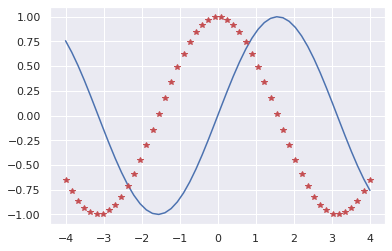

In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x = np.linspace(-4, 4, 50)
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, np.cos(x), '*', c='r')

plt.show()

точечная диаграмма

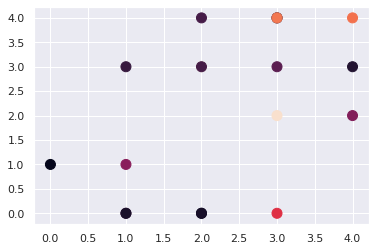

In [95]:
xy = np.random.randint(0, 5, (20, 2))
c = np.random.random_sample(size=20)
plt.scatter(xy[:, 0], xy[:, 1], s=100, c=c)

Столбиковая диаграмма

<BarContainer object of 3 artists>

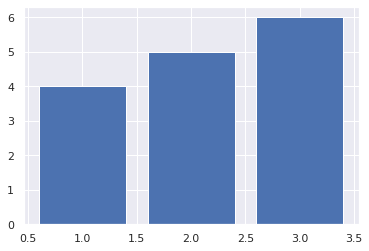

In [96]:
plt.bar([1, 2, 3], [4, 5, 6])

виджеты

In [97]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline


x = np.linspace(-10, 10, 100)

def func(a):
    plt.xlim((-10, 10))
    plt.ylim((-15, 15))
    plt.plot(x, np.cos(x) * a + x)
    plt.show()

interact(func, a=ipywidgets.IntSlider(min=-10,max=10,step=1,value=2))

interactive(children=(IntSlider(value=2, description='a', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.func(a)>

более сложную инфографика

Text(4, 40, '$\\int_4^9 f(x)\\mathrm{d}x$')

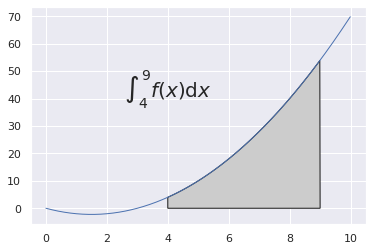

In [98]:
import matplotlib.patches as pc

def func(x):
    return(x - 3) * x

ax = plt.subplot(111)

a, b = 4, 9 # integral area
x = np.arange(0, 10, 0.01)
y = func(x)
plt.plot(x, y, linewidth=1)

ix = np.arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = pc.Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

plt.text(a, 40,
     r"$\int_4^9 f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)


# Plotly

Графики отображаются с помощью HTML (требуется установка виджетов для `Jupyter`), рассчитан наработу с `Pandas`

Объектное API

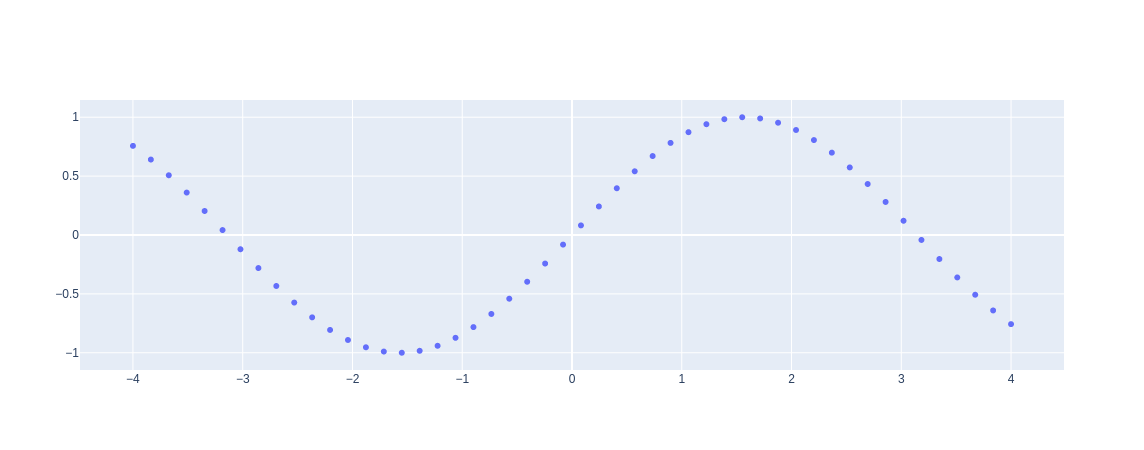

In [99]:
import plotly.graph_objects as go

x = np.linspace(-4, 4, 50)
y = np.sin(x)

fig = go.Figure(go.Scatter(
    x = x,
    y = y,
    mode='markers'
))

fig.show()

Классическое API

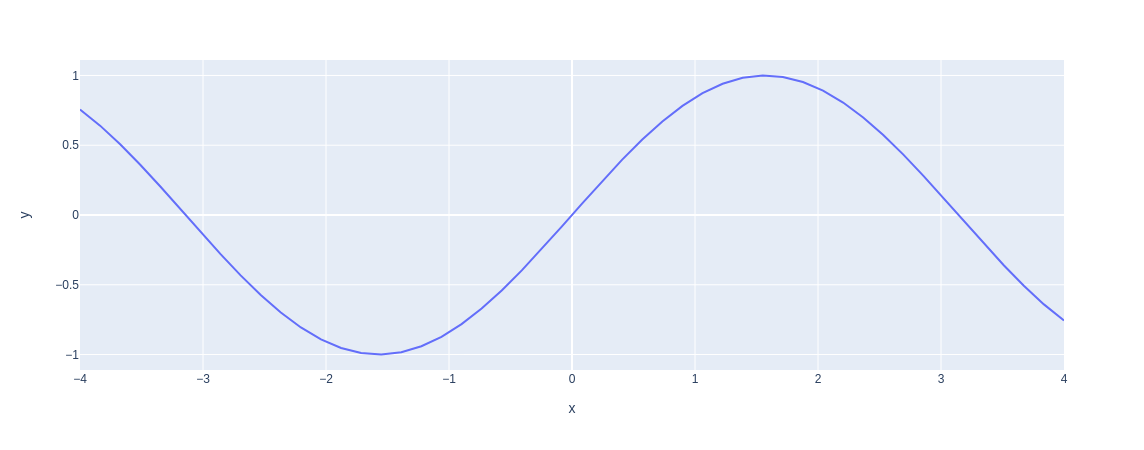

In [100]:
import plotly.express as px

x = np.linspace(-4, 4, 50)
y = np.sin(x)

px.line(x=x, y=y)

# Scipy

Пакет `SciPy` - это расширение `NumPy`, которое содержит большое количество функций для инженерных и научных вычислений. Например:

* поиск экстремума функций 
* численное интегрирование
* обработка сигналов
* решение систем ОДУ
* семплирование, математическая статистика


### Оптимизация

Приведем пример поиска минимум функции:

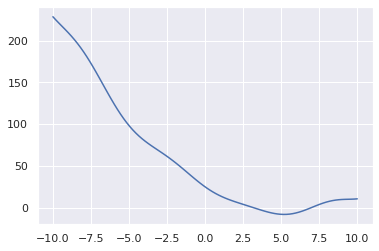

In [101]:
import scipy as sp

def func(x):
    return (x - 2) * np.sin(x) + (x - 5.) ** 2 - x


x = np.linspace(-10, 10, 100)

plt.plot(x, func(x))

Применяем реализованный в `SciPy` алгоритм Бройдена — Флетчера — Гольдфарба — Шанно

In [102]:
sp.optimize.fmin_bfgs(func, 0)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 27
         Gradient evaluations: 9


array([5.19725835])

# SimPy


`SymPy`- очень простая библиотека для символьных вычислений. Выражение задается декларативно с помощью синтаксиса `Python`. 

In [103]:
import sympy
from sympy import Symbol, sin, lambdify
sympy.init_printing()


sym_x = Symbol('x')
sym_x**2 + 2

Например, посчитаем производную функции $f(x) = (x-2) \cdot sin(x) + (x-5)^2 - x$

In [104]:
sym_x = Symbol('x')
sym_y = (sym_x - 2) * sin(sym_x) + (sym_x - 5) ** 2 - sym_x
sym_diff = sym_y.diff(sym_x)

sym_y

In [105]:
diff = lambdify(sym_x, sym_diff, 'numpy')

sp.optimize.fmin_bfgs(func, 0, diff)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


array([5.19725836])

In [106]:
diff(5)

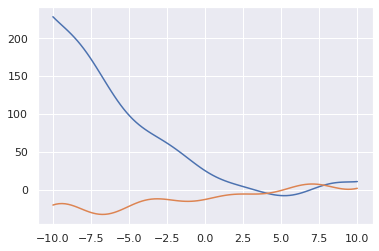

In [107]:
plt.plot(x, func(x))
plt.plot(x, diff(x))